In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['kc_house_data.csv']))

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

Dataset contains 21613 rows x 21 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


* There are/is House/Houses with max 33 bedrooms, that will massive be house

# Exploratory Data Analysis

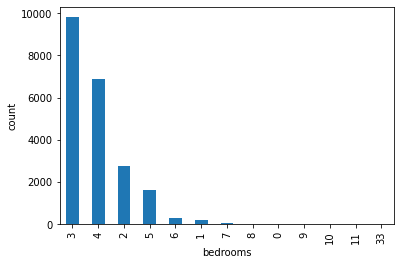

In [8]:
df['bedrooms'].value_counts().plot(kind='bar',xlabel='bedrooms',ylabel='count')

As we can see, 3 bedroom houses are most commonly sold houses, followed by 4 bedrooms houses. So, 3 and 4 bedroom houses are highest selling houses. Now let's see, at which locality these houses are most selling?

<Figure size 720x720 with 0 Axes>

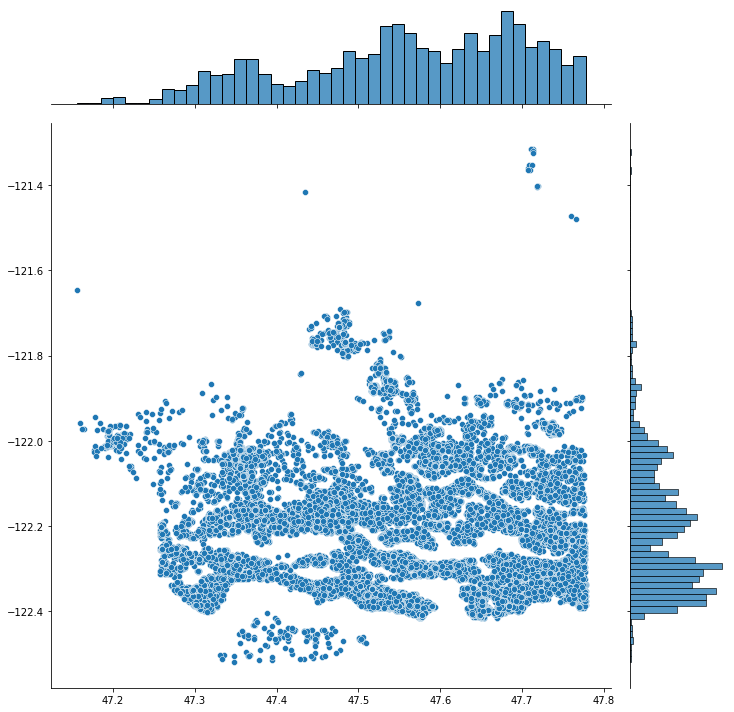

In [9]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values,size=10)
plt.xlabel('Latitute',fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.show()

For Latitude between 47.7 and 48.8, There are many houses. For Longitude between 122.2 and 122.4, concentration of houses is high. So, Most of the deals of buying houses has been for this particular area between these Latitude and Longitude.

Text(0, 0.5, 'Square feet')

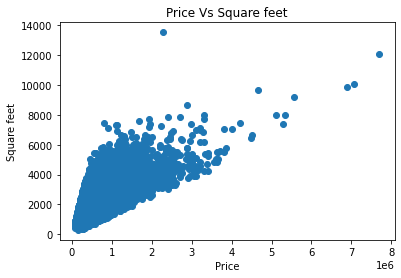

In [10]:
# Now let's see, if price is getting affected by living area or not?
plt.scatter(df.price,df.sqft_living)
plt.title('Price Vs Square feet')
plt.xlabel('Price')
plt.ylabel('Square feet')

As we can see that more the living area more the price of house. Though data is concentrated in a partical zone but datapoints seems to be in linear direction. The house with highest square feet sold at less price. This may be outlier or may be another reason for this. We will remove this outlier.

In [11]:
df = df.drop(df.index[df['sqft_living']==13540])
df.shape

(21612, 21)

[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Do not have waterfront'), Text(0, 0, 'Have waterfront')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Comparison of prices for houses having a waterfront or not')]

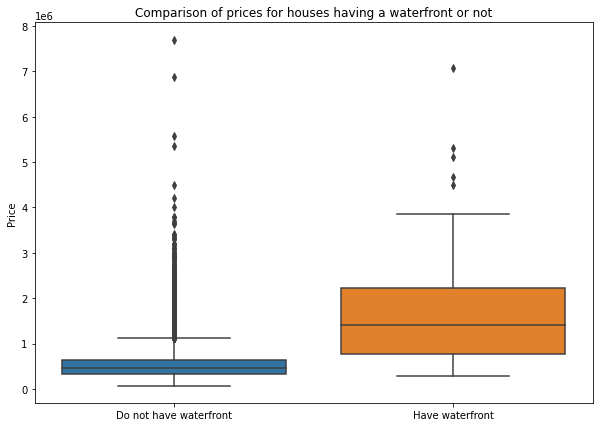

In [12]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='waterfront', y='price', data=df).set(xlabel='', ylabel='Price', title='Comparison of prices for houses having a waterfront or not',
                                                        xticklabels=['Do not have waterfront', 'Have waterfront'])

Houses that have waterfront properties do tend to have higher prices. But the number of waterfront properties in the sample with regards to non waterfront properties are very low.

In [13]:
#Extracting year and month from the date column and dropping date column
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [14]:
df = df.drop(columns='date')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


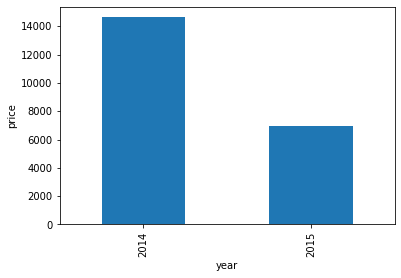

In [15]:
price = df['price'].value_counts()
df['year'].value_counts().plot(kind='bar',xlabel='year',ylabel='price')

Price range in 2014 is more than 2015

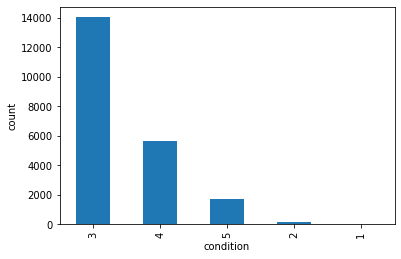

In [16]:
df['condition'].value_counts().plot(kind='bar',xlabel='condition',ylabel='count')

3 condition houses are most sold houses. These houses may be economical for most people and also good for their family.

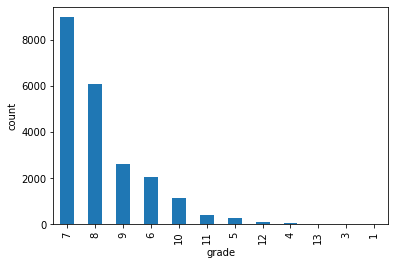

In [17]:
df['grade'].value_counts().plot(kind='bar',xlabel='grade',ylabel='count')

#Data Preprocessing

In [18]:
# Checking null values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

We have 2 null values in the sqft_above column. we can remove those two rows.

In [19]:
# Removing null values
df = df.dropna()


we can drop zipcode column because we can get information about location by combination of latitude and longitude.

In [20]:
df = df.drop(columns='zipcode')

In [21]:
# Dropping Id column
df = df.drop(columns='id')
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,47.6168,-122.045,1800,7503,2015,2


In [22]:
df['age'] = 2021-df['yr_built']
df = df.drop(columns='yr_built')
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,0,47.5112,-122.257,1340,5650,2014,10,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1991,47.7210,-122.319,1690,7639,2014,12,70
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,0,47.7379,-122.233,2720,8062,2015,2,88
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,0,47.5208,-122.393,1360,5000,2014,12,56
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,0,47.6168,-122.045,1800,7503,2015,2,34


we can also remove the yr_renovated column. Sqft_basement can be cover in sqft_living. We can make sqft_basement as binary variable i.e. 0 for basement and 1 for not having basement

In [23]:
# Converting sqft_basement into binary variable
df['sqft_basement'] = df['sqft_basement'].map(lambda x: 1 if x>0 else x)

In [24]:
#df = df.drop(columns='yr_renovated')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,0,47.5112,-122.257,1340,5650,2014,10,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,1,1991,47.7210,-122.319,1690,7639,2014,12,70
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,0,47.7379,-122.233,2720,8062,2015,2,88
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,1,0,47.5208,-122.393,1360,5000,2014,12,56
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,0,47.6168,-122.045,1800,7503,2015,2,34


In [25]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,age
price,1.000000,0.307778,0.524455,0.702217,0.088260,0.256382,0.266529,0.396649,0.036536,0.667181,0.605050,0.180042,0.126548,0.307004,0.021270,0.585001,0.080949,0.003703,-0.009966,-0.053826
bedrooms,0.307778,1.000000,0.515472,0.576794,0.030480,0.175007,-0.006568,0.078722,0.028557,0.356569,0.477058,0.163368,0.018888,-0.009093,0.129277,0.391211,0.027942,-0.009670,-0.001442,-0.154133
bathrooms,0.524455,0.515472,1.000000,0.754009,0.085446,0.500493,0.063860,0.186353,-0.124864,0.664783,0.684375,0.163255,0.050876,0.024378,0.222729,0.568146,0.084733,-0.026471,0.007567,-0.506326
sqft_living,0.702217,0.576794,0.754009,1.000000,0.169568,0.353778,0.104256,0.282988,-0.058538,0.763590,0.876205,0.204434,0.055700,0.052272,0.240133,0.757065,0.179848,-0.028872,0.012196,-0.318673
sqft_lot,0.088260,0.030480,0.085446,0.169568,1.000000,-0.006126,0.021656,0.073224,-0.008756,0.112575,0.181066,-0.035799,0.007717,-0.086028,0.229269,0.143463,0.717866,0.005701,-0.002217,-0.052812
floors,0.256382,0.175007,0.500493,0.353778,-0.006126,1.000000,0.023711,0.028819,-0.263776,0.457959,0.523834,-0.256741,0.006358,0.049537,0.125267,0.279532,-0.012262,-0.022170,0.014038,-0.489337
waterfront,0.266529,-0.006568,0.063860,0.104256,0.021656,0.023711,1.000000,0.402101,0.016652,0.082816,0.072253,0.037237,0.092883,-0.014267,-0.041909,0.086515,0.030772,-0.004165,0.008125,0.026168
view,0.396649,0.078722,0.186353,0.282988,0.073224,0.028819,0.402101,1.000000,0.046164,0.250699,0.165974,0.181650,0.104018,0.005999,-0.078825,0.279759,0.070994,0.001533,-0.005545,0.053722
condition,0.036536,0.028557,-0.124864,-0.058538,-0.008756,-0.263776,0.016652,0.046164,1.000000,-0.144587,-0.158250,0.135700,-0.060624,-0.014943,-0.106414,-0.092712,-0.003182,-0.045543,0.021962,0.361367
grade,0.667181,0.356569,0.664783,0.763590,0.112575,0.457959,0.082816,0.250699,-0.144587,1.000000,0.756072,0.051609,0.014452,0.114007,0.198147,0.712996,0.118151,-0.030318,0.008464,-0.446946


From here, We can determine feature importance. Features like sqft_living, sqft_above, etc are important features because they contribute more in determining the price. 


In [26]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,0,47.5112,-122.257,1340,5650,2014,10,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,1,1991,47.7210,-122.319,1690,7639,2014,12,70
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,0,47.7379,-122.233,2720,8062,2015,2,88
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,1,0,47.5208,-122.393,1360,5000,2014,12,56
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,0,47.6168,-122.045,1800,7503,2015,2,34


# Modelling

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb



In [28]:
#Dividing Data
y = df['price']
x = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_renovated','lat','long','sqft_living15','sqft_lot15','year','month','age']]

In [29]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Normalizing the  data
scaler = preprocessing.MinMaxScaler().fit(x)
x_scaled = scaler.transform(x)
data = pd.DataFrame(x_scaled, columns=[x.columns])
data


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,age
0,0.090909,0.12500,0.075680,0.003108,0.0,0.0,0.0,0.5,0.500000,0.103851,0.0,0.000000,0.571498,0.217608,0.161934,0.005742,0.0,0.818182,0.521739
1,0.090909,0.28125,0.193878,0.004072,0.4,0.0,0.0,0.5,0.500000,0.219370,1.0,0.988089,0.908959,0.166113,0.222165,0.008027,0.0,1.000000,0.556522
2,0.060606,0.12500,0.040816,0.005743,0.0,0.0,0.0,0.5,0.416667,0.056009,0.0,0.000000,0.936143,0.237542,0.399415,0.008513,1.0,0.090909,0.713043
3,0.121212,0.37500,0.142007,0.002714,0.0,0.0,0.0,1.0,0.500000,0.088681,1.0,0.000000,0.586939,0.104651,0.165376,0.004996,0.0,1.000000,0.434783
4,0.090909,0.25000,0.118197,0.004579,0.0,0.0,0.0,0.5,0.583333,0.162194,0.0,0.000000,0.741354,0.393688,0.241094,0.007871,1.0,0.090909,0.243478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21605,0.090909,0.31250,0.105442,0.000370,0.8,0.0,0.0,0.5,0.583333,0.144691,0.0,0.000000,0.874055,0.143688,0.194631,0.000986,0.0,0.363636,0.052174
21606,0.121212,0.31250,0.171769,0.003206,0.4,0.0,0.0,0.5,0.583333,0.235706,0.0,0.000000,0.570693,0.130399,0.246257,0.007523,1.0,0.090909,0.008696
21607,0.060606,0.09375,0.062075,0.000503,0.4,0.0,0.0,0.5,0.500000,0.085181,0.0,0.000000,0.705324,0.182724,0.106866,0.001558,0.0,0.454545,0.052174
21608,0.090909,0.31250,0.111395,0.001132,0.4,0.0,0.0,0.5,0.583333,0.152859,0.0,0.000000,0.608975,0.373754,0.173980,0.000731,1.0,0.000000,0.095652


In [31]:
lr = LinearRegression()
rfc = RandomForestRegressor()
adb = AdaBoostRegressor()
gb = GradientBoostingRegressor()
dt = DecisionTreeRegressor()
xg = xgb.XGBRegressor()

In [32]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=846)

In [33]:
clfs = {
    'lr':lr,
    'rfc':rfc,
    'adb':adb,
    'dt':dt,
    'gb':gb,
    'xg':xg
}

In [52]:
def train_regressor(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  y_pred = clf.predict(X_test)
  mae = mean_absolute_error(Y_test,y_pred)
  return mae

In [53]:
mae_errors = []
for name,clf in clfs.items():
    
    current_mae = train_regressor(clf, x_train,y_train,x_test,y_test)
    mae_errors.append(current_mae)
    

[08:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [91]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'MAE Error':mae_errors}).sort_values('MAE Error',ascending=True)

In [92]:
performance_df

,Algorithm,MAE Error
1,rfc,69357.883656
5,xg,77952.175982
4,gb,78040.555272
3,dt,99938.785747
0,lr,123668.051332
2,adb,311272.671959


## Cross validation

#### Cross Validation on Linear Regression

In [76]:
# Cross validation on Linear Regression
cv_scores = cross_val_score(LinearRegression(), data, y, scoring='neg_mean_absolute_error', cv=3)
a = -(cv_scores.mean())
b = cv_scores.std()
print('Mean of errors by cross validation is:',a)
print('Standard deviation of errors by cross validation is:',b)

Mean of errors by cross validation is: 127215.1258227846
Standard deviation of errors by cross validation is: 2741.558134080428


#### Cross Validation on Decision Tree Regressor

In [77]:
# Cross validation on Decision Tree Regressor
cv_scores = cross_val_score(DecisionTreeRegressor(), data, y, scoring='neg_mean_absolute_error', cv=3)
c = -(cv_scores.mean())
d = cv_scores.std()
print('Mean of errors by cross validation is:',c)
print('Standard deviation of errors by cross validation is:',d)

Mean of errors by cross validation is: 102297.20271705172
Standard deviation of errors by cross validation is: 1892.692828089243


Cross Validation on Random Forest Regressor

In [78]:
# Cross validation on Random Forest Regressor
cv_scores = cross_val_score(RandomForestRegressor(), data, y, scoring='neg_mean_absolute_error', cv=3)
e = -(cv_scores.mean())
f = cv_scores.std()
print('Mean of errors by cross validation is:',e)
print('Standard deviation of errors by cross validation is:',f)

Mean of errors by cross validation is: 70407.60150564465
Standard deviation of errors by cross validation is: 1553.1952794851693


#### Cross Validation on Gradient Boosting Regressor

In [79]:
# Cross validation on Gradient Boosting Regressor
cv_scores = cross_val_score(GradientBoostingRegressor(), data, y, scoring='neg_mean_absolute_error', cv=3)
g = -(cv_scores.mean())
h = cv_scores.std()
print('Mean of errors by cross validation is:',g)
print('Standard deviation of errors by cross validation is:',h)

Mean of errors by cross validation is: 79080.6733878894
Standard deviation of errors by cross validation is: 1459.5000754491525


#### Cross Validation on XGBoost Regressor

In [84]:
# Cross validation on XGBoost Regressor
cv_scores = cross_val_score(xgb.XGBRegressor(), data, y, scoring='neg_mean_absolute_error', cv=3)
i = -(cv_scores.mean())
j = cv_scores.std()
print('Mean of errors by cross validation is:',i)
print('Standard deviation of errors by cross validation is:',j)

[08:52:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean of errors by cross validation is: 79336.65981528834
Standard deviation of errors by cross validation is: 1307.3338096267466


#### cross validation on adaboost regressor

In [85]:
# Cross validation on XGBoost Regressor
cv_scores = cross_val_score(AdaBoostRegressor(), data, y, scoring='neg_mean_absolute_error', cv=3)
k = -(cv_scores.mean())
l = cv_scores.std()
print('Mean of errors by cross validation is:',k)
print('Standard deviation of errors by cross validation is:',l)

Mean of errors by cross validation is: 286546.9391552816
Standard deviation of errors by cross validation is: 18856.95676900561


## Summarizing All Models Performance

In [86]:
cross_error = [a,e,k,c,g,i]
cross_std = [b,f,l,d,h,j]

In [89]:
performance_dfc = pd.DataFrame({'Algorithm':clfs.keys(),'error':cross_error,'Standard deviation':cross_std}).sort_values('Standard deviation',ascending=True)

In [90]:
performance_dfc

,Algorithm,error,Standard deviation
5,xg,79336.659815,1307.333810
4,gb,79080.673388,1459.500075
1,rfc,70407.601506,1553.195279
3,dt,102297.202717,1892.692828
0,lr,127215.125823,2741.558134
2,adb,286546.939155,18856.956769


###As we can see that xgboost performing best on cross validation. Standard deviation is minimum for xgboost